# Particle Swarm Algorithm

In [16]:
! pip install pyswarms


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: C:\Users\dekota\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [17]:
# Import all the modules
import numpy as np
# Importing PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
import matplotlib.pyplot as plt
from pyswarms.utils.plotters import plot_contour, plot_surface
from pyswarms.utils.plotters.formatters import Designer
from pyswarms.utils.plotters.formatters import Mesher

In [18]:
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)
# Perform optimization
cost, pos = optimizer.optimize(fx.sphere, iters=1000)

2023-04-25 15:39:29,347 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=5.03e-45
2023-04-25 15:39:30,954 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.03397922738842e-45, best pos: [6.58048738e-23 2.65273031e-23]


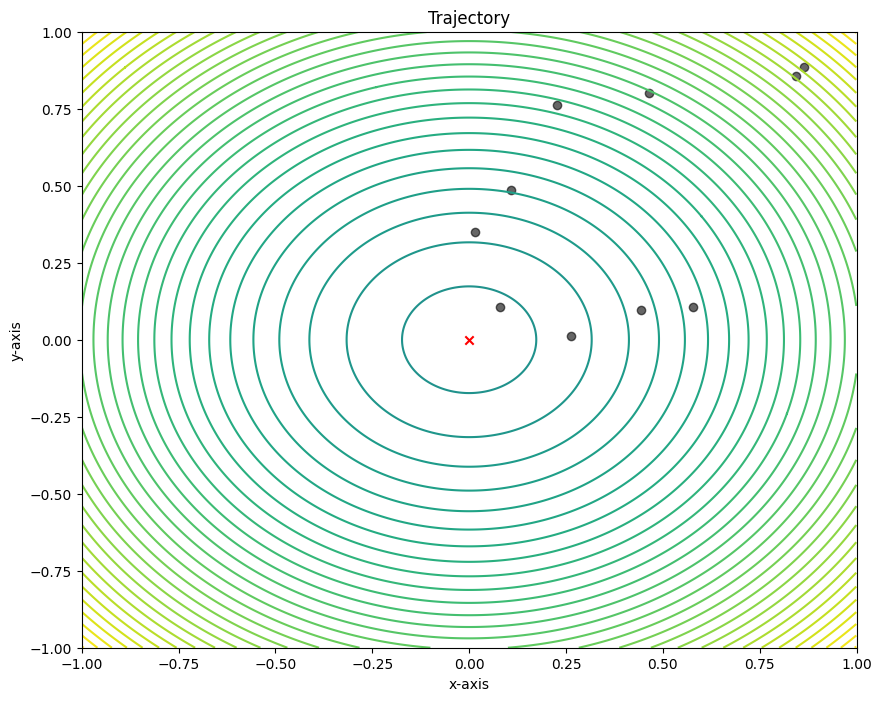

In [19]:

m = Mesher(func=fx.sphere)

animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0))

In [20]:
#animation.save('mymovie.mp4')

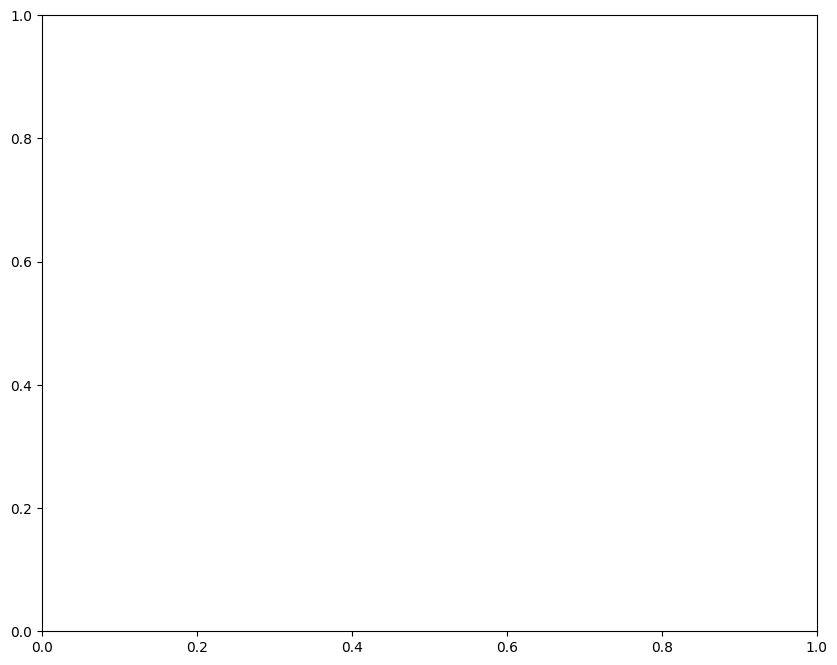

In [21]:
# The preprocessing
pos_history_3d = m.compute_history_3d(optimizer.pos_history)
# Adjusting the figure
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)], label=['x-axis', 'y-axis', 'z-axis'])

animation3d = plot_surface(pos_history=pos_history_3d, # The cost_history that we computed
                           mesher=m, designer=d,       # Various Customizations
                           mark=(0,0,0))               # Mark the minima

In [22]:
#animation3d.save('sphere.mp4')

# EXAMPLE 2

In [23]:
# Import sphere function as objective function
from pyswarms.utils.functions.single_obj import sphere as f

# Import backend modules
import pyswarms.backend as P
from pyswarms.backend.topology import Star

%load_ext autoreload
%autoreload 2

In [24]:
my_topology = Star() # The Topology Class
my_options = {'c1': 0.6, 'c2': 0.3, 'w': 0.4} # arbitrarily set
my_swarm = P.create_swarm(n_particles=50, dimensions=2, options=my_options) # The Swarm Class

print('The following are the attributes of our swarm: {}'.format(my_swarm.__dict__.keys()))

The following are the attributes of our swarm: dict_keys(['position', 'velocity', 'n_particles', 'dimensions', 'options', 'pbest_pos', 'best_pos', 'pbest_cost', 'best_cost', 'current_cost'])


In [25]:

iterations = 100 # Set 100 iterations
for i in range(iterations):
    # Part 1: Update personal best
    my_swarm.current_cost = f(my_swarm.position) # Compute current cost
    my_swarm.pbest_cost = f(my_swarm.pbest_pos)  # Compute personal best pos
    my_swarm.pbest_pos, my_swarm.pbest_cost = P.compute_pbest(my_swarm) # Update and store

    # Part 2: Update global best
    # Note that gbest computation is dependent on your topology
    if np.min(my_swarm.pbest_cost) < my_swarm.best_cost:
        my_swarm.best_pos, my_swarm.best_cost = my_topology.compute_gbest(my_swarm)

    # Let's print our output
    if i%20==0:
        print('Iteration: {} | my_swarm.best_cost: {:.4f}'.format(i+1, my_swarm.best_cost))

    # Part 3: Update position and velocity matrices
    # Note that position and velocity updates are dependent on your topology
    my_swarm.velocity = my_topology.compute_velocity(my_swarm)
    my_swarm.position = my_topology.compute_position(my_swarm)

print('The best cost found by our swarm is: {:.4f}'.format(my_swarm.best_cost))
print('The best position found by our swarm is: {}'.format(my_swarm.best_pos))

Iteration: 1 | my_swarm.best_cost: 0.0616
Iteration: 21 | my_swarm.best_cost: 0.0022
Iteration: 41 | my_swarm.best_cost: 0.0021
Iteration: 61 | my_swarm.best_cost: 0.0021
Iteration: 81 | my_swarm.best_cost: 0.0021
The best cost found by our swarm is: 0.0021
The best position found by our swarm is: [0.01955573 0.04173328]


In [26]:

from pyswarms.single import GlobalBestPSO

optimizer = GlobalBestPSO(n_particles=50, dimensions=2, options=my_options) # Reuse our previous options
optimizer.optimize(f, iters=100)

2023-04-25 15:52:45,063 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.4}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.0111
2023-04-25 15:52:45,417 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.011102445373743514, best pos: [0.07462887 0.07438398]


(0.011102445373743514, array([0.07462887, 0.07438398]))

In [27]:

# Import modules
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

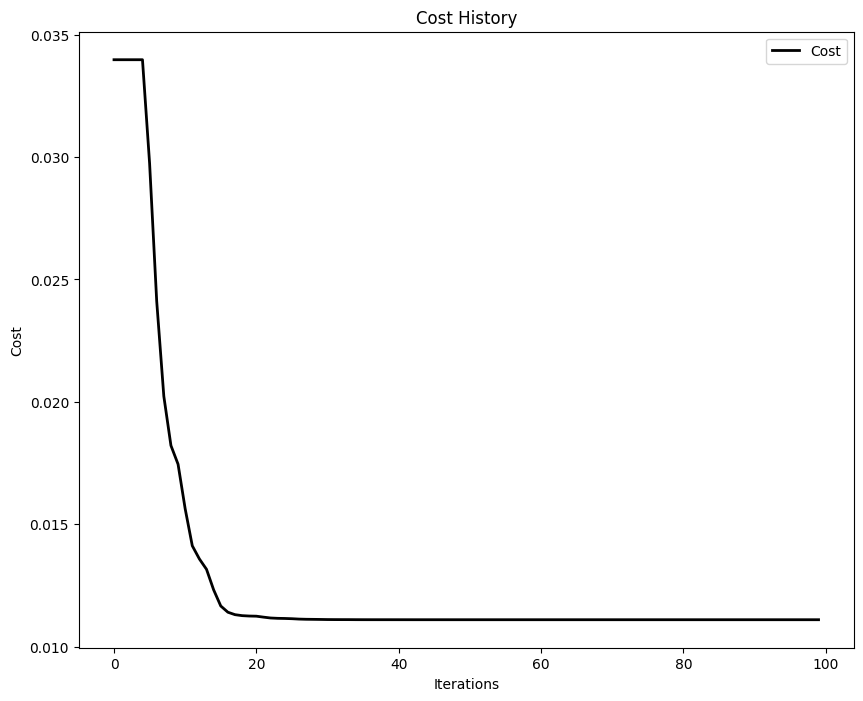

In [28]:

plot_cost_history(cost_history=optimizer.cost_history)
plt.show()